<a href="https://colab.research.google.com/github/szh141/QI-2024/blob/main/Day_2_PSF_cont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

psf, sigma of 10
circle with diameter of 45,35,25 vs 10, 5, 3.

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi # ndi.convolve is for matrix with vector, not for image
from scipy import signal # signal.convolve2d for image
from skimage import filters

(<Axes: >, <matplotlib.image.AxesImage at 0x79bb0f37f070>)

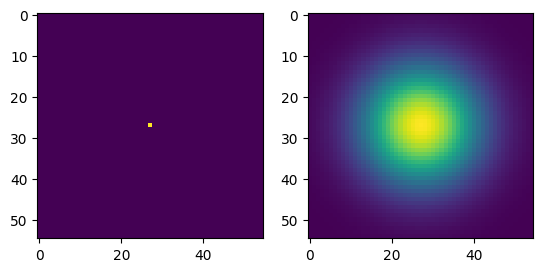

In [36]:
psf = np.zeros((55,55))
psf[55//2,55//2] = 1
psf_blur = filters.gaussian(psf, 10)
psf_blur /=np.sum(psf_blur)

plt.subplot(121), plt.imshow(psf)
plt.subplot(122),plt.imshow(psf_blur)

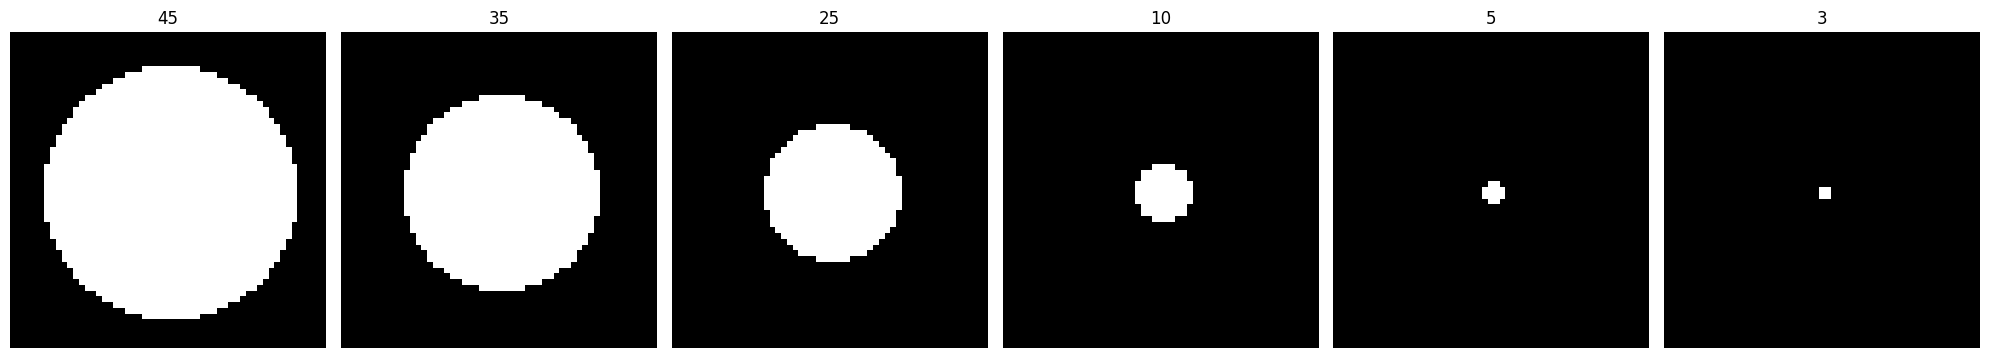

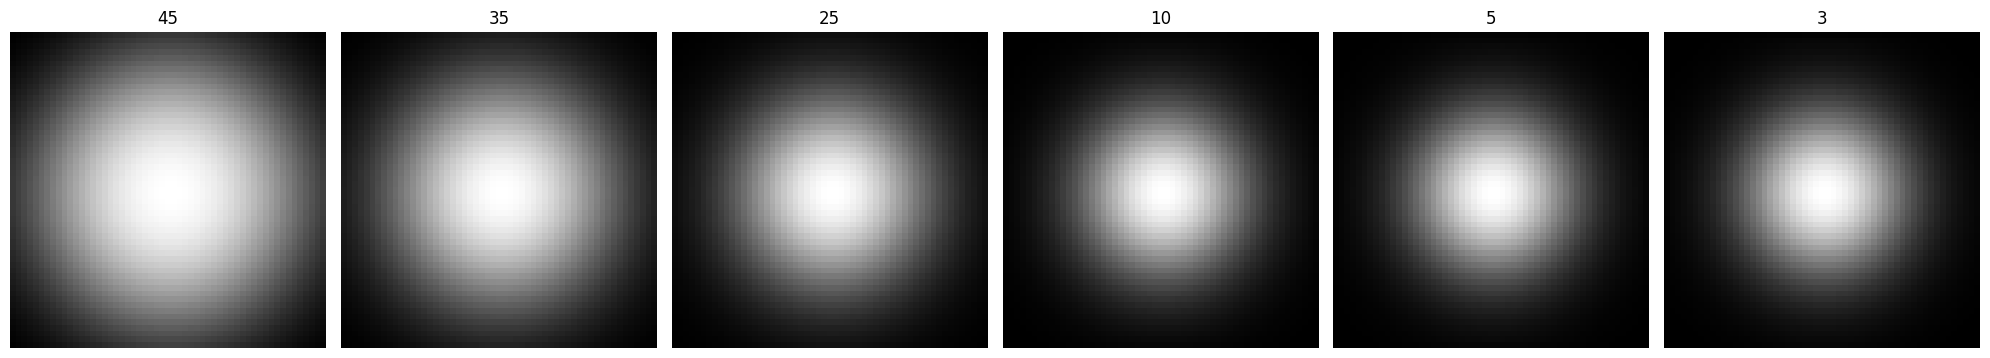

In [39]:
XX, YY = np.arange(55),np.arange(55)
X,Y = np.meshgrid(XX,YY)
center = 55/2

diameter = [45,35,25,10,5,3]
circle_blurs = []
circles = []

for d in diameter:
  circle = np.sqrt((X-center)**2 + (Y-center)**2) <  d//2
  circles.append(circle)
  circle_blur = signal.convolve2d(circle,psf_blur,'same')
  circle_blurs.append(circle_blur)

fig, axes = plt.subplots(1, len(circles), figsize=(20, 10))
for ax, image, label in zip(axes, circles, diameter):
  ax.imshow(image, cmap='gray')
  ax.set_title(label)
  ax.axis('off')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(circle_blurs), figsize=(20, 10))
for ax, image, label in zip(axes, circle_blurs, diameter):
  ax.imshow(image, cmap='gray')
  ax.set_title(label)
  ax.axis('off')
plt.tight_layout()
plt.show()

why w/o 'same', shape of (55,55) convolved with shape of (55,55)
yield (109,109) 55 + 55 - 1

In [42]:
circle = np.sqrt((X-center)**2 + (Y-center)**2) <  45//2
circle_blur = signal.convolve2d(circle,psf_blur) # w/o 'same'
print('psf shape is ', psf.shape)
print('circle shape is ', circle.shape)
print('circle convolved shape is ', circle_blur.shape)

psf shape is  (55, 55)
circle shape is  (55, 55)
circle convolved shape is  (109, 109)


https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

mode
str {‘full’, ‘valid’, ‘same’}, optional
A string indicating the size of the output:

**full**
The output is the full discrete linear convolution of the inputs. (Default)

**valid**
The output consists only of those elements that do not rely on the zero-padding. In ‘valid’ mode, either in1 or in2 must be at least as large as the other in every dimension.

**same**
The output is the same size as in1, centered with respect to the ‘full’ output.

In [46]:
test = np.zeros((1100,1100))
test_psf = np.zeros((50,50))
test_blur = signal.convolve2d(test,test_psf) # w/o 'same'
test_blur.shape


(1149, 1149)

In [49]:
# in CNN, convoluton layer

test = np.zeros((1100,1100))
test_psf = np.zeros((50,50))
test_blur = signal.convolve2d(test,test_psf,'valid')
test_blur.shape

(1051, 1051)

In [48]:
test = np.zeros((1100,1100))
test_psf = np.zeros((50,50))
test_blur = signal.convolve2d(test,test_psf,'same')
test_blur.shape

(1100, 1100)